#### N·∫°p ch·ªìng to√°n t·ª≠

In [1]:
Base.:(==)(s1::Tuple{Int,Int}, s2::Tuple{Int,Int}) = (s1[1] == s2[1]) && (s1[2] == s2[2])
Base.:+(s1::Tuple{Int,Int}, s2::Tuple{Int,Int}) = (s1[1] + s2[1], s1[2] + s2[2])
Base.:-(s1::Tuple{Int,Int}, s2::Tuple{Int,Int}) = (s1[1] - s2[1], s1[2] - s2[2])
Base.:(==)(s1::Tuple{Tuple{Int,Int},Tuple{Int,Int}}, s2::Tuple{Tuple{Int,Int},Tuple{Int,Int}}) = (s1[1] == s2[1]) && (s1[2] == s2[2])
Base.:(==)(s1::Tuple{Tuple{Int,Int},Tuple{Int,Int},Tuple{Int,Int}}, s2::Tuple{Tuple{Int,Int},Tuple{Int,Int},Tuple{Int,Int}}) = (s1[1] == s2[1]) && (s1[2] == s2[2]) && (s1[3] == s2[3])


#### N·∫°p ch·ªìng to√°n t·ª≠ in ƒë·ªÉ ki·ªÉm tra xem 1 ƒëi·ªÉm c√≥ n·∫±m trong Dictionary

In [2]:
function check_key(key::Tuple{Tuple{Int,Int},Tuple{Int,Int},Tuple{Int,Int}}, dic::Dict)
    if key in keys(dic)
        return true
    end
    return false
end
function check_key(key::Tuple{Tuple{Int,Int},Tuple{Int,Int}}, dic::Dict)
    if key in keys(dic)
        return true
    end
    return false
end
function check_key(key::Tuple{Int,Int}, dic::Dict)
    if key in keys(dic)
        return true
    end
    return false
end

check_key (generic function with 3 methods)

#### C√°c h√†m h·ªó tr·ª£ kh√°c

In [3]:
function turn_left_index(s::Tuple{Int,Int},a::Tuple{Int,Int})
    val = findfirst(u -> u == a,hex_neighbors(s))
    return mod1(val+1, 6)
end
function turn_right_index(s::Tuple{Int,Int},a::Tuple{Int,Int})
    val = findfirst(u -> u == a,hex_neighbors(s))
    return mod1(val-1, 6)
end
function check_in(a::Tuple{Int,Int},b)
    for tmp in b
        if a == tmp
            return true
        end
    end
    return false
end

check_in (generic function with 1 method)

#### Th√¥ng s·ªë li√™n quan ph·ª•c v·ª• cho c·∫•u h√¨nh MDP

In [4]:
#Ra kh·ªèi map 
out_border = -1
#T(s,a,s')
#Tuple{Tuple{Int,Int},Tuple{Int,Int},Tuple{Int,Int}} -> Float64
dict_T = Dict()
#R(s)
#Tuple{Int,Int} -> Float64
dict_R = Dict()
#--------------------------------------------------------------

Dict{Any, Any}()

#### T√≠nh to√°n T v√† R

In [5]:

function calc_transition_and_reward_dict(hexes::Vector{Tuple{Int,Int}},p_straight, hex_rewards)
    null_state = (-100,-100)
    #T·ªâ l·ªá quy·∫øt ƒë·ªãnh vi·ªác r·∫Ω tr√°i ho·∫∑c r·∫Ω ph·∫£i
    p_turn = (1-p_straight)/2
    for s in filter(u -> u != null_state,hexes)
        if !haskey(hex_rewards,s)
            neighbors = hex_neighbors(s)
            for a in neighbors
                s‚Ä≤ = a
                if !(check_in(s‚Ä≤,hexes))
                    #ƒêi th·∫≥ng
                    if check_key(s,dict_R)
                        s‚Ä≤ = s 
                        dict_R[s] += out_border*p_straight
                    else 
                        dict_R[s] = out_border*p_straight
                    end
                end
                if check_key((s,a-s,s‚Ä≤),dict_T)
                    dict_T[(s,a-s,s‚Ä≤)] += p_straight
                else
                    dict_T[(s,a-s,s‚Ä≤)] = p_straight
                end


                #ƒêi tr√°i
                a_left = turn_left_index(s,a)
                neigh_left = neighbors[a_left]
                s‚Ä≤ = neigh_left
                if !(check_in(s‚Ä≤,hexes))
                    if check_key(s,dict_R)
                        s‚Ä≤ = s
                        dict_R[s] += out_border*p_turn
                    else
                        dict_R[s] = out_border*p_turn
                    end
                end
                if check_key((s,neigh_left-s,s‚Ä≤),dict_T)
                    dict_T[(s,neigh_left-s,s‚Ä≤)] += p_turn
                else
                    dict_T[(s,neigh_left-s,s‚Ä≤)] = p_turn
                end
                
                #ƒêi ph·∫£i
                a_right = turn_right_index(s,a)
                neigh_right = neighbors[a_right]
                s‚Ä≤ = neigh_right
                if !(check_in(s‚Ä≤,hexes))
                    if check_key(s,dict_R)
                        s‚Ä≤ = s
                        dict_R[s] += out_border*p_turn
                    else
                        dict_R[s] = out_border*p_turn
                    end
                end
                if check_key((s,neigh_right-s,s‚Ä≤),dict_T)
                    dict_T[(s,neigh_right-s,s‚Ä≤)] += p_turn
                else
                    dict_T[(s,neigh_right-s,s‚Ä≤)] = p_turn
                end
            end
        else
            for a in action
                dict_T[(s,a,null_state)] = 1.0
                if check_key(s,dict_R)
                    dict_R[s] += hex_rewards[s]
                else
                    dict_R[s] = hex_rewards[s]
                end
            end
        end
    end
    for a in action
        dict_T[(null_state,a,null_state)] = 1.0
    end
end

calc_transition_and_reward_dict (generic function with 1 method)

#### C·∫•u h√¨nh c·ªßa MDP

In [6]:
struct MDP
    Œ≥ # discount factor
    ùíÆ # state space
    ùíú # action space
    T # transition function
    R # reward function
    TR # sample transition and reward
end
MDP(Œ≥, ùíÆ, ùíú, T, R) = MDP(Œ≥, ùíÆ, ùíú, T, R, nothing)

function lookahead(P::MDP, U, s, a)
    S, T, R, Œ≥ = P.S, P.T, P.R, P.Œ≥
    return R(s,a) + Œ≥*sum(T(s,a,s‚Ä≤)*U(s‚Ä≤) for s‚Ä≤ in S)
end


function lookahead(ùí´::MDP, U::Vector, s, a)
    ùíÆ, T, R, Œ≥ = ùí´.ùíÆ, ùí´.T, ùí´.R, ùí´.Œ≥
    return R(s,a) + Œ≥*sum(T(s,a,s‚Ä≤)*U[i] for (i,s‚Ä≤) in enumerate(ùíÆ))
end

lookahead (generic function with 2 methods)

#### Th√¥ng s·ªë cho MDP (n·∫øu ch·ªânh th√¨ s·∫Ω ch·ªânh state, discount_factor)

In [7]:
#State
state =  [(2,1), (3,1), (4,1), (5,1), (6,1), (7,1), (8,1), (9,1), (10,1), (11,1),
(2,2), (3,2), (4,2), (6,2), (9,2), (10,2),
(1,3), (2,3), (3,3), (4,3), (6,3), (8,3), (10,3)]
#Discount factor
discount_factor = 0.99
function T(s,a,s‚Ä≤)
    if !check_key((s,a,s‚Ä≤), dict_T)
        return 0
    end
    return dict_T[(s,a,s‚Ä≤)]
end
function R(s,a=missing)
    if !check_key(s, dict_R)
        return 0
    end
    return dict_R[s]
end
#action
action =[(1,0),(0,1),(-1,1),(-1,0),(0,-1),(1,-1)]
function hex_neighbors(hex::Tuple{Int,Int})
    i,j = hex
    [(i+1,j),(i,j+1),(i-1,j+1),(i-1,j),(i,j-1),(i+1,j-1)]
end

hex_neighbors (generic function with 1 method)

#### ValueFunctionPolicy

In [8]:
struct ValueFunctionPolicy
    ùí´ # b√†i to√°n
    U # k·∫øt qu·∫£
end
function greedy(ùí´::MDP, U, s)
    u, a = findmax(a->lookahead(ùí´, U, s, a), ùí´.ùíú)
    return (a=a, u=u)
end
(œÄ::ValueFunctionPolicy)(s) = action[greedy(œÄ.ùí´, œÄ.U, s).a]


function backup(ùí´::MDP, U, s)
    return maximum(lookahead(ùí´, U, s, a) for a in ùí´.ùíú)
end

backup (generic function with 1 method)

#### Thu·∫≠t to√°n Value Iteration

In [9]:
struct ValueIteration
    k_max # s·ªë l·∫ßn duy·ªát
end
    
function solve(M::ValueIteration, ùí´::MDP)
    U = [0.0 for s in ùí´.ùíÆ]
    for k = 1:M.k_max
        U = [backup(ùí´, U, s) for s in ùí´.ùíÆ]
    end
    return ValueFunctionPolicy(ùí´, U)
end

solve (generic function with 1 method)

#### Ph·∫ßn t√≠nh to√°n Value Iteration

In [10]:
#Ph·∫ßn th∆∞·ªüng ƒë·∫°t ƒë∆∞·ª£c
hex_rewards = Dict{Tuple{Int,Int}, Float64}(
    (2,2) =>  5.0,
    (3,3) => -10.0,
    (10,3) =>  10.0,
)
#T·ªâ l·ªá quy·∫øt ƒë·ªãnh ƒëi th·∫≥ng
p_straight = 0.7
calc_transition_and_reward_dict(state,p_straight,hex_rewards)

VI = ValueIteration(20)
Problem = MDP(discount_factor,state,action,T,R)
value = solve(VI,Problem).U

23-element Vector{Float64}:
  28.078503507723376
  32.402528795680176
  34.10103948135922
  36.4656964458174
  39.86433984426
  43.297312974
  46.764962600000004
  51.27774
  54.826
  52.826
   ‚ãÆ
  54.826
  57.4
  28.078503507723376
  32.402528795680176
 -60.0
  30.75002908654563
  34.4656964458174
  49.27774
  60.0

#### Ph·∫ßn v·∫Ω ƒë·ªì th·ªã

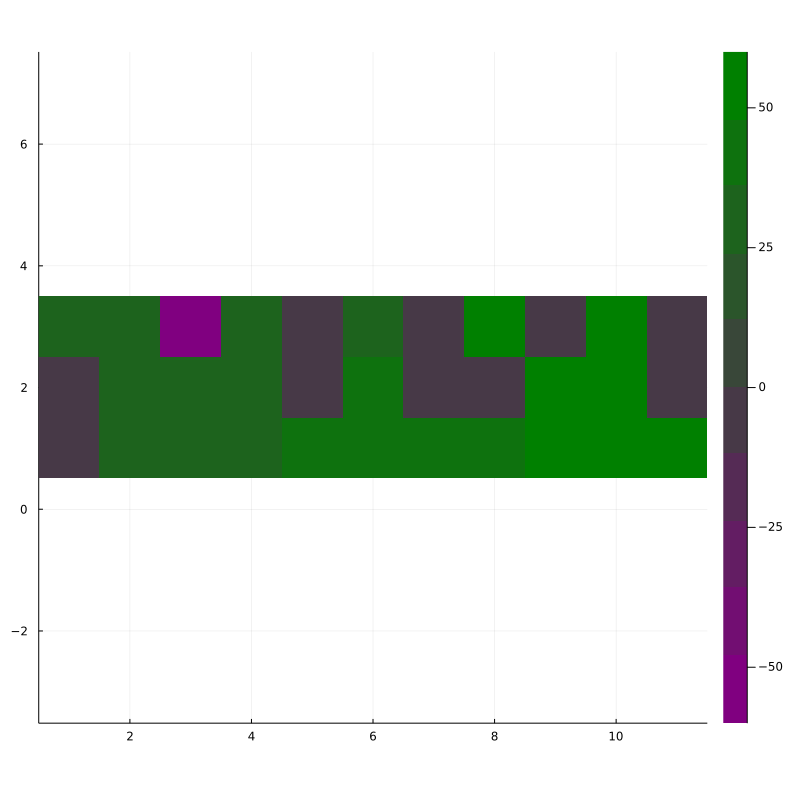

In [11]:
using Plots
gr()
#0 + 1 ƒë·ªÉ d·ªùi cho vi·ªác v·∫Ω heatmap
#-1
a = maximum([k[1] for k in state])
b = maximum([k[2] for k in state])

xs = [i for i in 1:a]
ys = [i for i in 1:b]

z = zeros(b,a)
for i in 1:length(state)
    x,y = state[i]
    z[y,x] = value[i]
end
heatmap(xs,ys,z,aspect_ratio=1,c=palette([:purple, :green], 10),size=(800,800))



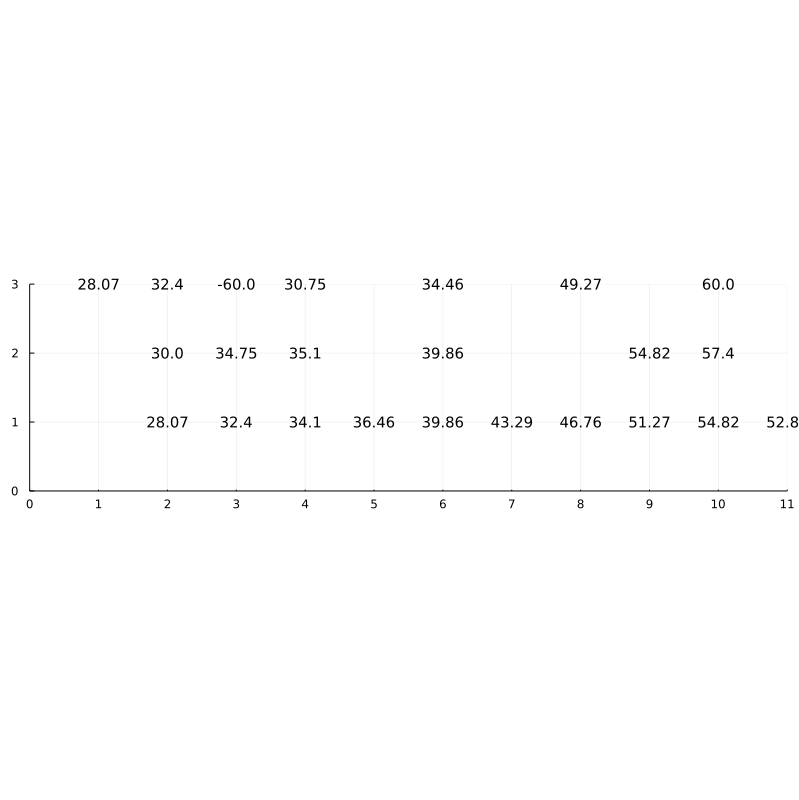

In [12]:
hex_rewards = Dict{Tuple{Int,Int}, Float64}(
    (2,2) =>  5.0,
    (3,3) => -10.0,
    (10,3) =>  10.0,
)
plot(xticks = 0:a, yticks = 0:b, xlim = (0, a), ylim = (0,b), aspect_ratio = 1, annotationfontsize=10, size=(800,800))
annotate!(map(x -> x[1],state),map(x -> x[2],state),map(x -> floor(x,digits=2),value))